In [2]:
import os
import cv2
import time
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [3]:
path= "./crop_resize_reverse"
train_file_0= os.listdir(path+ "/train/NORMAL")
train_file_1= os.listdir(path+ "/train/PNEUMONIA")
test_file_0= os.listdir(path+ "/test/NORMAL")
test_file_1= os.listdir(path+ "/test/PNEUMONIA")

In [4]:
X_full= 0
check= False

for file in train_file_0:
    img_in= cv2.imread(path+ "/train/NORMAL/"+ file, cv2.IMREAD_GRAYSCALE)
    img_res= cv2.resize(img_in, dsize= (100, 100), interpolation= cv2.INTER_LINEAR)
    img_round= img_res/255
    img_resh= img_round.reshape((100, 100, 1))
    img= img_resh.reshape((1, )+ img_resh.shape)
    
    if(check== False):
        X_full= img
        check= True
    else:
        X_full= np.vstack((X_full, img))

for file in train_file_1:
    img_in= cv2.imread(path+ "/train/PNEUMONIA/"+ file, cv2.IMREAD_GRAYSCALE)
    img_res= cv2.resize(img_in, dsize= (100, 100), interpolation= cv2.INTER_LINEAR)
    img_round= img_res/255
    img_resh= img_round.reshape((100, 100, 1))
    img= img_resh.reshape((1, )+ img_resh.shape)
    X_full= np.vstack((X_full, img))


In [5]:
y_full= np.array([0]* len(train_file_0))
y_full_1= np.array([1]* len(train_file_1))
y_full= np.append(y_full, y_full_1)


In [6]:
X_test, y_train= shuffle(X_full, y_full, random_state= 42)

In [7]:
X_train, X_val, y_train, y_val= train_test_split(X_full, y_full, test_size= 0.25)

In [8]:
np.save("./dataset/X_train", X_train)
np.save("./dataset/y_train", y_train)
np.save("./dataset/X_val", X_val)
np.save("./dataset/y_val", y_val)

In [9]:
X_test= 0
check= False

for file in test_file_0:
    img_in= cv2.imread(path+ "/test/NORMAL/"+ file, cv2.IMREAD_GRAYSCALE)
    img_res= cv2.resize(img_in, dsize= (100, 100), interpolation= cv2.INTER_LINEAR)
    img_round= img_res/255
    img_resh= img_round.reshape((100, 100, 1))
    img= img_resh.reshape((1, )+ img_resh.shape)
    
    if(check== False):
        X_test= img
        check= True
    else:
        X_test= np.vstack((X_test, img))

for file in test_file_1:
    img_in= cv2.imread(path+ "/test/PNEUMONIA/"+ file, cv2.IMREAD_GRAYSCALE)
    img_res= cv2.resize(img_in, dsize= (100, 100), interpolation= cv2.INTER_LINEAR)
    img_round= img_res/255
    img_resh= img_round.reshape((100, 100, 1))
    img= img_resh.reshape((1, )+ img_resh.shape)
    X_test= np.vstack((X_test, img))


In [10]:
y_test= np.array([0]* len(test_file_0))
y_test_1= np.array([1]* len(test_file_1))
y_test= np.append(y_test, y_test_1)

In [11]:
X_test, y_test= shuffle(X_test, y_test, random_state= 42)

In [12]:
np.save("./dataset/X_test", X_test)
np.save("./dataset/y_test", y_test)

In [13]:
X_train= np.load("./dataset/X_train.npy")
y_train= np.load("./dataset/y_train.npy")
X_val= np.load("./dataset/X_val.npy")
y_val= np.load("./dataset/y_val.npy")
X_test= np.load("./dataset/X_test.npy")
y_test= np.load("./dataset/y_test.npy")

In [14]:
model= keras.models.Sequential()

In [15]:
model.add(keras.layers.Conv2D(64, 10, activation= "relu", padding= "same", input_shape= [100, 100, 1]))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation= "relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(2, activation= "softmax"))


In [16]:
model.compile(loss= "sparse_categorical_crossentropy", optimizer= "sgd", metrics= ["accuracy"])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 64)      6464      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 160000)            0         
                                                                 
 dense (Dense)               (None, 32)                5120032   
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 2)                 66        
                                                        

In [18]:
start_time= time.time()
history= model.fit(X_train, y_train, epochs= 30, validation_data= (X_val, y_val))
end_time= time.time()
print("time: ", end_time- start_time)

Epoch 1/30
123/123 [==============================] - 22s 176ms/step - loss: 0.5250 - accuracy: 0.7432 - val_loss: 0.4471 - val_accuracy: 0.7339
Epoch 2/30
123/123 [==============================] - 21s 174ms/step - loss: 0.4420 - accuracy: 0.7458 - val_loss: 0.8216 - val_accuracy: 0.7339
Epoch 3/30
123/123 [==============================] - 21s 173ms/step - loss: 0.3991 - accuracy: 0.7711 - val_loss: 0.3393 - val_accuracy: 0.8229
Epoch 4/30
123/123 [==============================] - 21s 173ms/step - loss: 0.3645 - accuracy: 0.8455 - val_loss: 0.3093 - val_accuracy: 0.8980
Epoch 5/30
123/123 [==============================] - 22s 175ms/step - loss: 0.3509 - accuracy: 0.8632 - val_loss: 0.3549 - val_accuracy: 0.7531
Epoch 6/30
123/123 [==============================] - 22s 180ms/step - loss: 0.3328 - accuracy: 0.8754 - val_loss: 0.3581 - val_accuracy: 0.7991
Epoch 7/30
123/123 [==============================] - 21s 175ms/step - loss: 0.2973 - accuracy: 0.8908 - val_loss: 0.2604 - val_ac

In [19]:
model.save("./model/learning_model")

INFO:tensorflow:Assets written to: ./model/learning_model\assets


INFO:tensorflow:Assets written to: ./model/learning_model\assets


In [20]:
import pandas as pd
import matplotlib.pyplot as plt

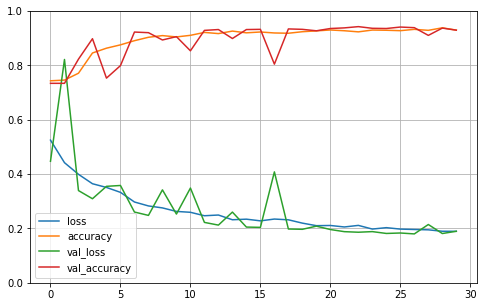

In [21]:
pd.DataFrame(history.history).plot(figsize= (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


In [22]:
y_pred=np.argmax(model.predict(X_test), axis=-1)
y_pred

20/20 [==============================] - 1s 38ms/step


array([1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [23]:
y_test

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,

In [24]:
accuracy= 0

for i in range(len(y_test)):
    if(y_test[i]== y_pred[i]).all():
        accuracy+= 1
        
print("accuracy: ", accuracy/len(y_test))

accuracy:  0.717948717948718
